### K-평균 군집화
- k-평균 군집화에서 가장 일반적으로 사용되는 알고리즘
- k-평균은 군집 중심(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트 들을 선택하는 기법 
- 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선정해 다시 중심정을 평균 지점으로 이동하는 프로세스를 반복적으로 수행


- 장점
- 1. 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 2. 알고리즘이 쉽고 간결함 

- 단점
- 1. 거리 기반 알고리즘으로 속성의 개수가 많을 경우 군집화 정확도가 떨어짐-> PCA로 차원 축소를 적용해야할 수도 있음
- 2. 반복을 수행하는데 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
- 3. 몇 개의 군집(cluster)을 선택해야 할지 가이드하기가 어려움

### 사이킷런 Kmeans 클래스

- 하이퍼 파라미터 소개
- n_clusters: 군집화할 개수, 군집 중심점의 개수를 의미
- init: 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++방식으로 최초 설정함
- max_iter: 최대 반복 횟수이며 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

- labels_:각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers: 각 군집 중심점 좌표(shape는 [군집 개수, 피처 개수])이를 이용하면 군집 중심점 좌표가 어딘지 시각화 가능


In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris() 
#더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


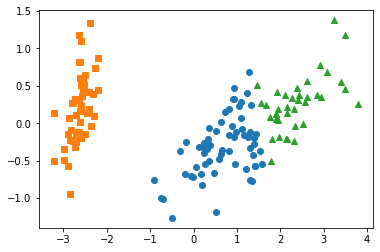

In [8]:
#군집 값이 0,1,2인 경우 마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

#군집 값이 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출 'o','s',^로 표기
plt.scatter(x= irisDF.loc[marker0_ind,'pca_x'],y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x= irisDF.loc[marker1_ind,'pca_x'],y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x= irisDF.loc[marker2_ind,'pca_x'],y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples =200, n_features =2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

(200, 2) (200,)


In [10]:
#y_target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [67 67 66]


In [11]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns =['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


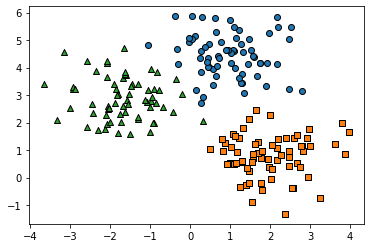

In [12]:
target_list = np.unique(y)
#각 타깃별 산점도의 마커값 
markers=['o','s','^','P','D','H','x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
#target=0, target=1,target=2로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolor='k',marker=markers[target])
    
plt.show()

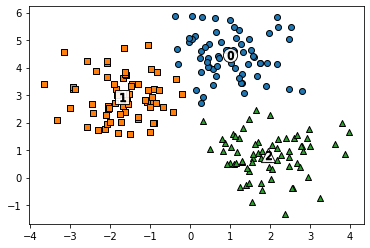

In [14]:
#Kmeans 객체를 이용해 X데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=200,random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

#cluster_centers_는 개별 클러스터링의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels =  np.unique(cluster_labels)

markers=['o','s','^','P','D','H','x']

#군집된 label유형별ㄹ로 iteration 하면서 marker별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'], edgecolor='k',marker=markers[label])
    
    #군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',alpha=0.9, edgecolor='k',marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',edgecolor='k',marker='$%d$' %label)
plt.show()

In [15]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


### 군집 평가
- 비지도 학습의 특성상 어떠한 지표라도 정확하게 평가하기 어려움

- 평가 지표
- 실루엣 분석: 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지 나타냄
- 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 얼마나 떨어져 있고 동일 군집 끼리는 서로 가깝게 잘 뭉쳐 있다는 것을 의미함
- 군집화가 잘될수록 개별 군집은 비슷한 정도의 여유공간을 가진고 떨어져 있음

- 실루엣 분석은 실루엣 계수를 기반으로하며 실루엣 계수는 개별 데이터가 가지는 군집화 지표
- 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표
- 실루엣 계수는 -1에서 1사이의 값을 가지며 1로 가까워질 수록 근처의 군집과 더 멀리 떨어져있다는 뜻이고 0에 가까울 수록 근처의 군집과 가까워 진다는 뜻


In [21]:
from sklearn.preprocessing import scale

#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF= pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters =3 , init='k-means++',max_iter=300,random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data,irisDF['cluster'])
print('silhouette_samples() return 값의 shape:',score_samples.shape)t6tfc

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff']=score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape: (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.552819


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [22]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 평균 이동(Mean Shift)
- 평균 이동은 k-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행함
- k-평균이 중심에 소속된 데이터 의 평균 거리 중심으로 이동하는 데 반해 평균 이동은 중심을 데이터가 모여있는 밀도가 가장 높은 곳으로 이동 시킴
- 평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾음
- 군집 중심점은 데이터 포이트가 모여있는 곳-> 확률 밀도 함수를 이용
- 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하여 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)을 이용함
- 평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와 거리 값을 KDE함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트 하면서 이동하는 방식을 취함
- KDE(Kernel Density Estimation)는 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추청하는 대표적인 방법

In [23]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state = 0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels= meanshift.fit_predict(X)
print('cluster label 유형:',np.unique(cluster_labels))

cluster label 유형: [0 1 2 3 4 5]


In [24]:
meanshift = MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [25]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:',round(bandwidth,3))

bandwidth 값: 1.816


In [26]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y

#estimate_bandwidth()로 최적 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels= meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


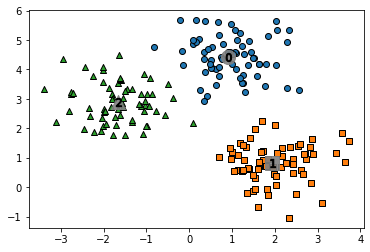

In [29]:
clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
makers=['o','s','^','x','*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    
    #군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y= label_cluster['ftr2'], edgecolor='k',marker=markers[label])
    
    #군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1],s=200, color='grey',alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1],s=70, color='k',edgecolor='k',marker='$%d$'%label)
    
plt.show()

In [30]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


### GMM(Gaussian Mixture Model)
- GMM 군집화는 적용하고자 하는 데이터가 여러 개의 가우시안 분포(GaussianDistribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식
- 정규분포(Normal distribution)으로도 알려진 가우시안 분포는 좌우 대칭형 종(bell) 형태를 가진 통계학에서 가장 잘 알려진 연속확률 함수

In [31]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [33]:
iris = load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']

#좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns = feature_names)
irisDF['target'] = iris.target

In [36]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels= gmm.predict(iris.data)

#군집화 결과를 irisDF의 'gmm_cluster'칼럼명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target

#target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [39]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels=kmeans.predict(iris.data)
irisDF['kmeans_cluster']=kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


### DBSCAN
- 밀도 기반 군집화의 대표적인 알고리즘DBSCAN(Density Based Spatial CLustering of Applications with Noise)
- 특정 공간 내에 테이터 밀도 차이를 기반으로한 알고리즘을 하고 있어서 복잡한 기하학 적 분포를 가진 데이터 세트에 대해서 군집화를 잘 수행함

- 중요 파라미터
- 1. 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 2. 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

- 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족 시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의함
- 1. 핵심 포인트(core points): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고함
- 2. 이웃 포인트(Neighbor point):주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 함 
- 3. 경계 포인트(Border Point):주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라고 함
- 4. 잡음 포인트(Noise Point):최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라고함 



In [41]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples= 8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
irisDF['taeget'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64
